# Amazon Appliance Products Review-Sentiment Analysis-EDA

### Import Necessary Libraries

In [ ]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
#import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
#import contractions
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the Cleaned Dataset

In [ ]:
df = pd.read_csv('/content/clean_review_refrigerators.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        4688 non-null   object
 1   reviewer_id       4688 non-null   object
 2   reviewer_name     4688 non-null   object
 3   rating            4688 non-null   int64 
 4   vote              4688 non-null   int64 
 5   verified          4688 non-null   bool  
 6   unix_review_time  4688 non-null   int64 
 7   categories        4688 non-null   object
 8   product_title     4688 non-null   object
 9   brand_name        4688 non-null   object
 10  review_text       4688 non-null   object
 11  rating_class      4688 non-null   object
 12  review_time       4688 non-null   object
 13  clean_text        4688 non-null   object
dtypes: bool(1), int64(3), object(10)
memory usage: 480.8+ KB


### Inspecting the Dataset

In [ ]:
df.head(3)

,product_id,reviewer_id,reviewer_name,rating,vote,verified,unix_review_time,categories,product_title,brand_name,review_text,rating_class,review_time,clean_text
0,B000EPN8ZK,A3TQILK3NW422X,houston professional,4,14,True,1233878400,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,happliy surprised STILL GOING 2 YEARS LATER af...,good,06-02-2009,happliy surprise still go years later read rev...
1,B000EPN8ZK,A2DSNSLKP5USA3,Joe Schmoe,5,3,False,1233705600,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,"The Fridge Best bang for my buck, Can't get a ...",good,04-02-2009,fridge best bang buck cant get better deal mon...
2,B000EPN8ZK,A2B20U8YF5NB3F,Amazon_Customer,1,50,False,1217203200,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,DOA I did not read the reviews before purchasi...,bad,28-07-2008,doa not read review purchase pay price refrige...


In [ ]:
df.shape

(4688, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4688 entries, 0 to 4687
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   product_id        4688 non-null   object
 1   reviewer_id       4688 non-null   object
 2   reviewer_name     4688 non-null   object
 3   rating            4688 non-null   int64 
 4   vote              4688 non-null   int64 
 5   verified          4688 non-null   bool  
 6   unix_review_time  4688 non-null   int64 
 7   categories        4688 non-null   object
 8   product_title     4688 non-null   object
 9   brand_name        4688 non-null   object
 10  review_text       4688 non-null   object
 11  rating_class      4688 non-null   object
 12  review_time       4688 non-null   object
 13  clean_text        4688 non-null   object
dtypes: bool(1), int64(3), object(10)
memory usage: 480.8+ KB


In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
import pandas_profiling

In [ ]:
pandas_profiling.ProfileReport(df)

## Exploratory Data Analysis

In [ ]:
### 1.  "Product" Feature

In [ ]:
plt.style.use('seaborn-bright')

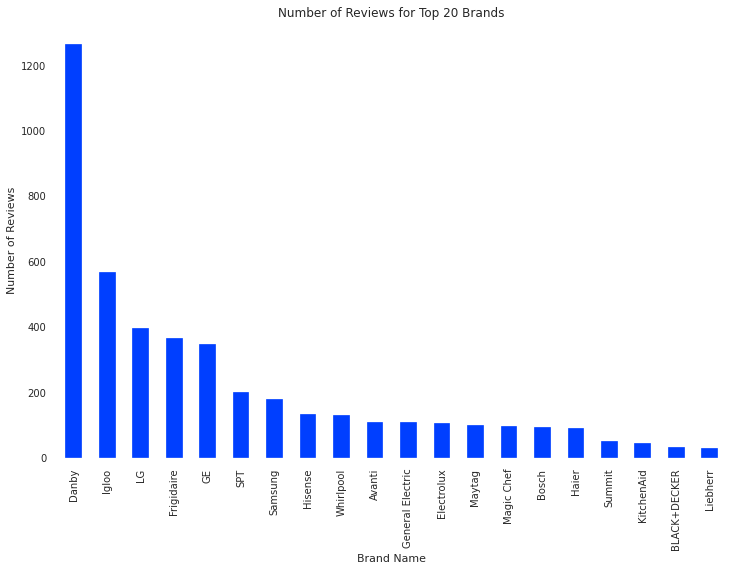

In [ ]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = df["brand_name"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')
plt.show()

Text(0, 0.5, 'Number of Reviews')

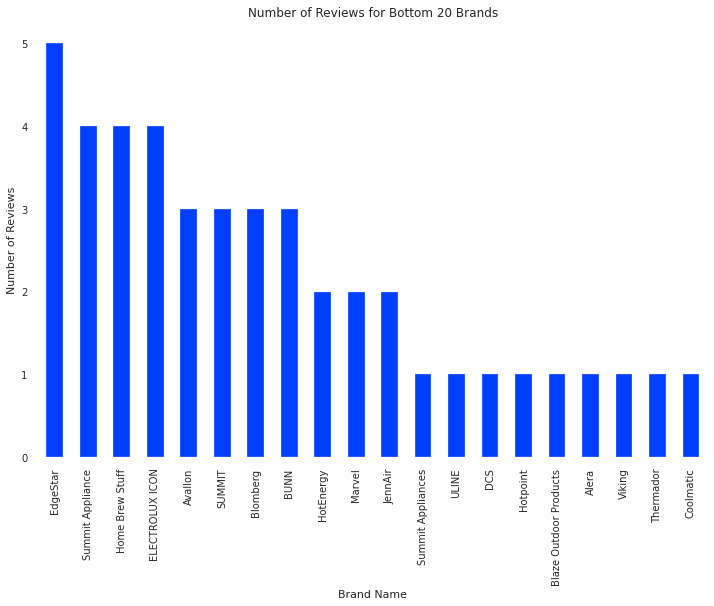

In [ ]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = df["brand_name"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

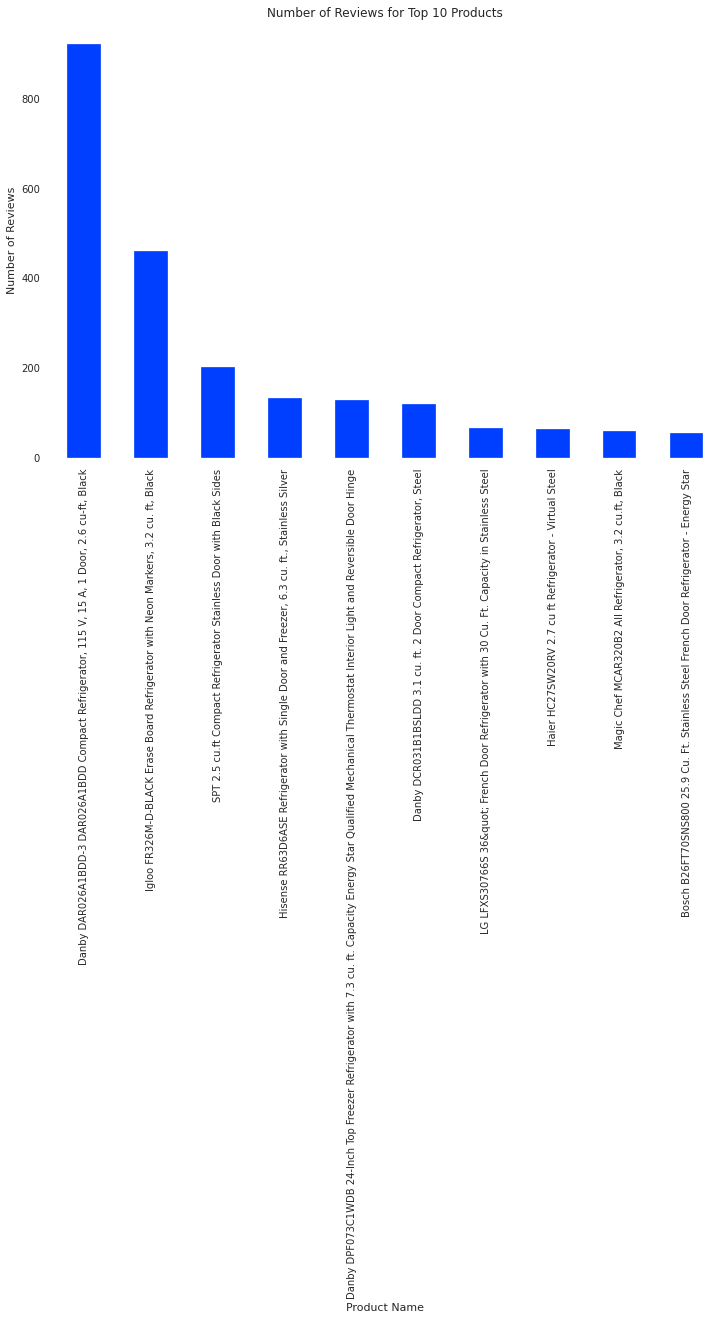

In [ ]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = df["product_title"].value_counts()
plt.figure(figsize=(12,8))
products[:10].plot(kind='bar')
plt.title("Number of Reviews for Top 10 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')
plt.show()

#### low rating and reviews

In [ ]:
df.product_id[df['rating']>3].head(20)

0     B000EPN8ZK
1     B000EPN8ZK
6     B000EPN8ZK
7     B000EPN8ZK
12    B000EPN8ZK
13    B000EPN8ZK
19    B000EPN8ZK
21    B000EPN8ZK
27    B000SDMQQ0
28    B000SDMQQ0
30    B000SDMQQ0
31    B000SDMQQ0
32    B000SDMQQ0
34    B000SDMQQ0
35    B000SDMQQ0
37    B000SDMQQ0
41    B000SDMQQ0
43    B000SDMQQ0
44    B000SDMQQ0
45    B000SDMQQ0
Name: product_id, dtype: object

In [ ]:
j_5 = df[(df['product_id']=="B000EPN8ZK") & (df['rating']<2)]
#j_5 = df[(df['product_id']=="B000EPN8ZK")]

j_5.shape

(20, 14)

In [ ]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in j_5['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords)


[['doa', 'not', 'read', 'review', 'purchase', 'pay', 'price', 'refrigerator', 'deadonarrival', 'doa', 'send', 'back', 'shame', 'not', 'read', 'review', 'ahead', 'time', 'echo', 'statements', 'others', 'not', 'buy', 'product'], ['suck', 'not', 'buy', 'item', 'igloo', 'refrigerators', 'make', 'curtis', 'intl', 'no', 'one', 'no', 'one', 'make', 'part', 'break', 'fast', 'mine', 'year', 'old', 'part', 'break', 'throw', 'cant', 'get', 'part', 'call', 'curtis', 'youll', 'speak', 'someone', 'bangladesh', 'make', 'repeat', 'name', 'time', 'repeat', 'phone', 'number', 'another', 'time', 'tell', 'dont', 'part', 'no', 'no', 'one', 'make', 'part', 'no', 'cant', 'tell'], ['stay', 'away', 'igloo', 'products', 'purchase', 'igloo', 'refrigerator', 'within', 'weeks', 'completely', 'stop', 'work', 'curtis', 'international', 'igloos', 'parent', 'company', 'terrible', 'customer', 'service', 'not', 'honor', 'customer', 'warranties', 'year', 'try', 'ge', 'resolve', 'find', 'unsatisfactory', 'record', 'better

In [ ]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1


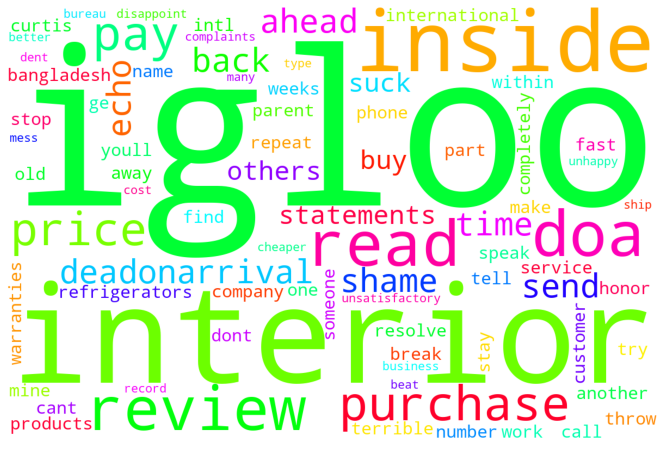

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
CustomStopwords = list(STOPWORDS) + ['item','thing','refrigerator','year','month','product','week','temp','pepsi']

all_words4 = Bag_Of_Words(ListWords)

wordcloudimage = WordCloud(max_words=80,
                           font_step = 2,
                           max_font_size = 700,
                           stopwords = CustomStopwords,
                           width = 1200,
                           height = 800,
                           colormap = 'hsv',
                           background_color = 'white').generate(' '.join(all_words4.keys())
)
                      
plt.figure(figsize=(15,8))
plt.imshow(wordcloudimage)
plt.axis('off')
plt.show()

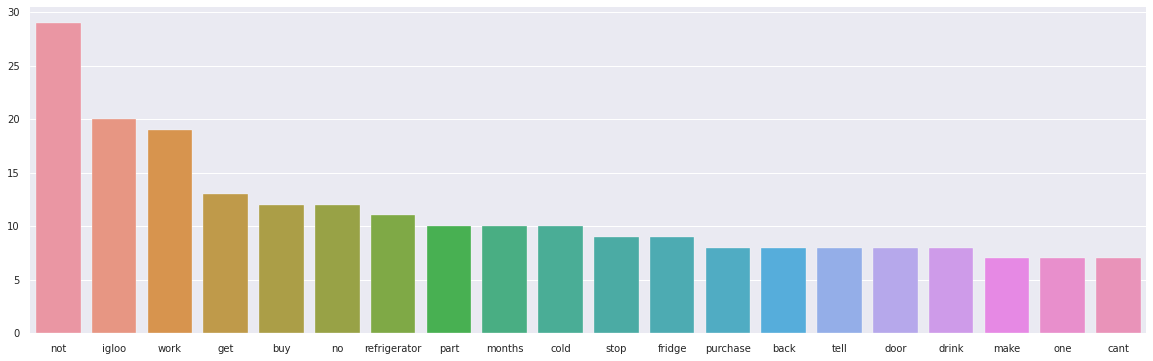

In [ ]:
plt.figure(figsize = (20,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(20):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [ ]:
j_1 = df[(df['product_id']=="B000SDMQQ0") & (df['rating']>3)]
j_1.shape

(17, 14)

In [ ]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])


['sleek', 'shallow', 'spacesaving', 'order', 'fridge', 'online', 'kind', 'gamble', 'buy', 'large', 'appliance', 'online', 'seller', 'pay', 'end', 'fridge', 'really', 'great', 'look', 'feel', 'really', 'well', 'put', 'together', 'fit', 'shallow', 'sera', 'countertops', 'much', 'better', 'traditional', 'fridge', 'would', 'stick', 'foot', 'taller', 'average', 'american', 'fridge', 'shallow', 'really', 'like', 'way', 'change', 'functionality', 'shallower', 'shelve', 'mean', 'no', 'lose', 'halfempty', 'jar', 'tomatoes', 'unfinished', 'hummus', 'containers', 'start', 'grow', 'mold', 'ecosystems', 'also', 'course', 'mean', 'less', 'storage', 'folks', 'might', 'want', 'particularly', 'freezer', 'get', 'one', 'shelf', 'one', 'fullsize', 'drawer', 'one', 'mini', 'halfsize', 'drawer', 'know', 'since', 'freezer', 'generally', 'contain', 'ice', 'random', 'bag', 'freeze', 'peas', 'blueberries', 'maybe', 'ice', 'cream', 'freeze', 'baby', 'food', 'figure', 'wed', 'fine', 'like', 'buy', 'bulk', 'want',

In [ ]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2

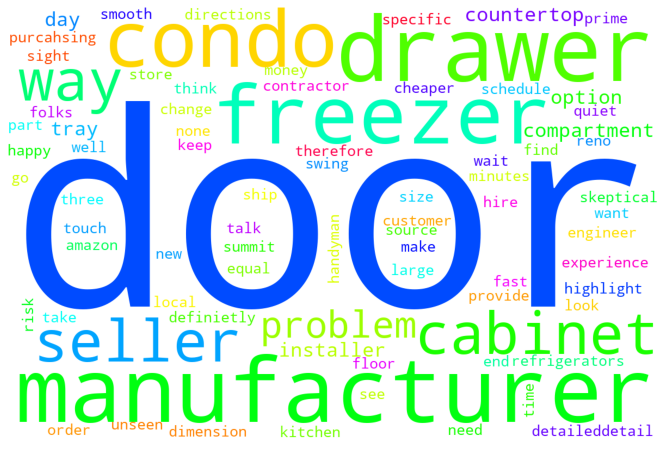

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
CustomStopwords = list(STOPWORDS) + ['appliance','fridge','item','thing','refrigerator','year','month','product','week','temp','pepsi']

all_words5 = Bag_Of_Words(ListWords1)

wordcloudimage = WordCloud(max_words=80,
                           font_step = 2,
                           max_font_size = 700,
                           stopwords = CustomStopwords,
                           width = 1200,
                           height = 800,
                           colormap = 'hsv',
                           background_color = 'white').generate(' '.join(all_words5.keys())
)
                      
plt.figure(figsize=(15,8))
plt.imshow(wordcloudimage)
plt.axis('off')
plt.show()

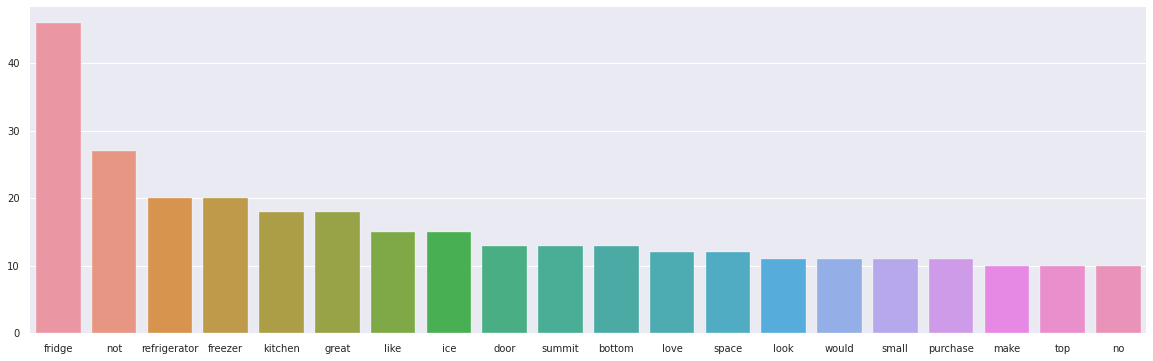

In [ ]:
plt.figure(figsize = (20,6))

import seaborn as sns
from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(20):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

### 1.  "rating_class" and "Review Length" Features

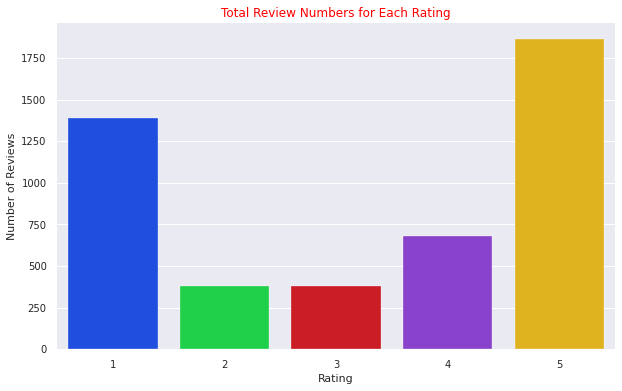

5    1866
1    1387
4     678
2     379
3     378
Name: rating, dtype: int64

In [ ]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(df['rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating'].value_counts()

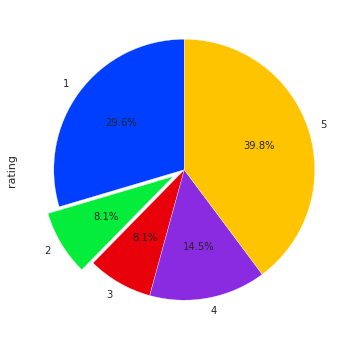

In [ ]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('rating').rating.count()
df.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [ ]:
#data=review_df.copy()
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))


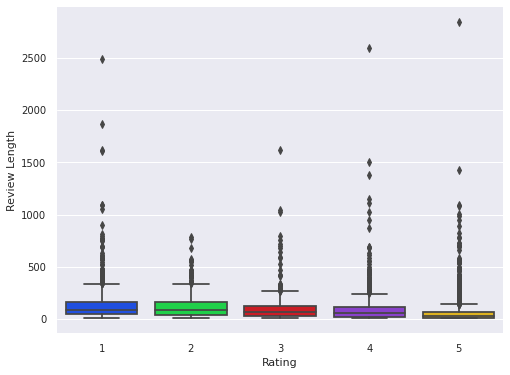

In [ ]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()


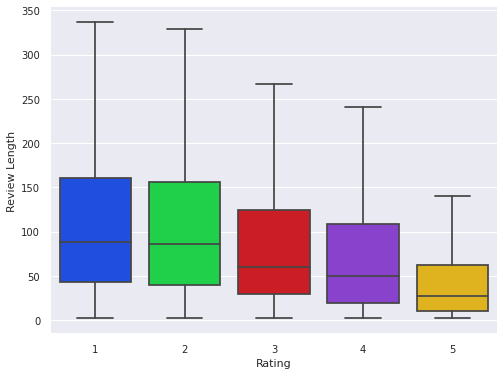

In [ ]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

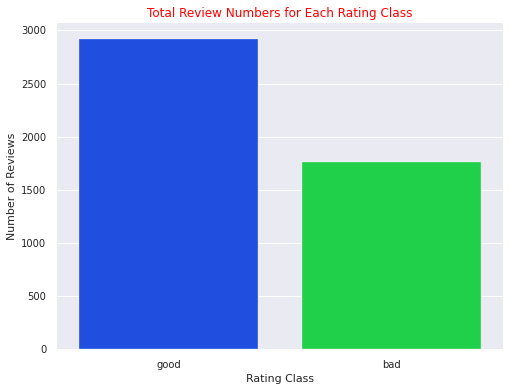

good    2922
bad     1766
Name: rating_class, dtype: int64

In [ ]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (8,6))
sns.countplot(df['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating_class'].value_counts()

MOst of the customers who bought headphones from amazon were having good rating on the product 
High rating products are less in review length compared to small rating 

### 2. Features

### 2.1. "year" Feature

In [ ]:
# Create a year column and drop time column
#df['reviewtime'] = pd.to_datetime(df['time'], format = '%Y %m %d')
# Create a "year" column and drop time column
df['review_time'] = pd.to_datetime(df['review_time'])
df['year'] = df['review_time'].dt.year
df = df.drop('review_time', axis = 1)
df.head(3)

,product_id,reviewer_id,reviewer_name,rating,vote,verified,unix_review_time,categories,product_title,brand_name,review_text,rating_class,clean_text,year
0,B000EPN8ZK,A3TQILK3NW422X,houston professional,4,14,True,1233878400,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,happliy surprised STILL GOING 2 YEARS LATER af...,good,happliy surprise still go years later read rev...,2009
1,B000EPN8ZK,A2DSNSLKP5USA3,Joe Schmoe,5,3,False,1233705600,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,"The Fridge Best bang for my buck, Can't get a ...",good,fridge best bang buck cant get better deal mon...,2009
2,B000EPN8ZK,A2B20U8YF5NB3F,Amazon_Customer,1,50,False,1217203200,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,DOA I did not read the reviews before purchasi...,bad,doa not read review purchase pay price refrige...,2008


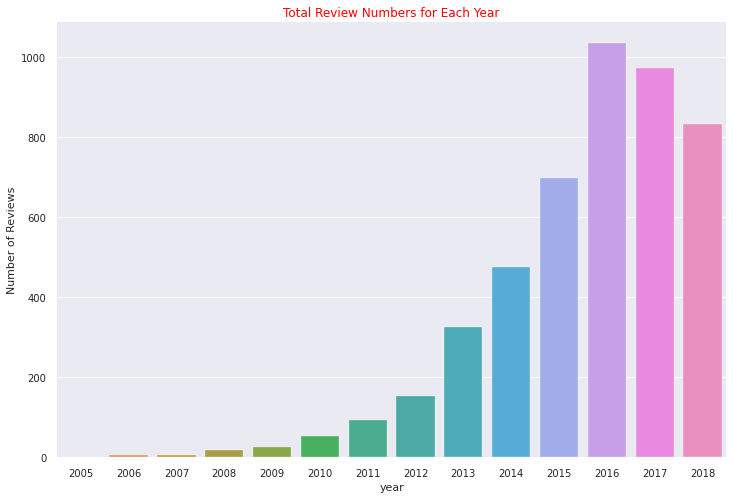

2016    1034
2017     972
2018     831
2015     698
2014     474
2013     326
2012     152
2011      93
2010      54
2009      26
2008      17
2007       5
2006       5
2005       1
Name: year, dtype: int64

In [ ]:
##################################################################
# Total review for every year in the Headphone product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

Except 2002, 'good ratings' percentage is progressing over 92%. 2002 has the lowest good ratings with 88% overall (There are only 25 reviews). 'good ratings' percentage is 100% in 2000 (10 reviews) and 2001 (16 reviews). As it might be seen in the graph, the overall good rating is progressing between 93% and 97% in home and kitchen products.

### 2.2. "customer" Feature

#### Unique Customers

In [ ]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df['reviewer_id'].unique())))

Number of unique customers: 4560


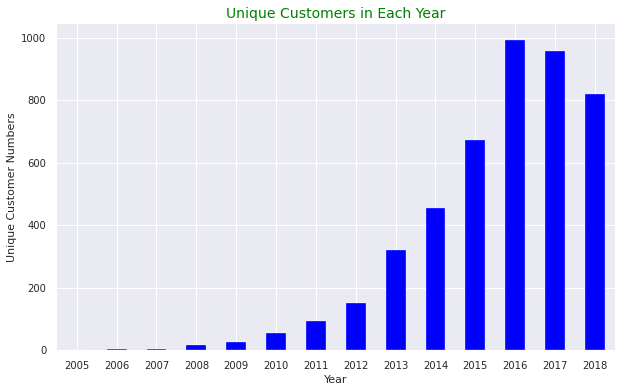

year
2005      1
2006      5
2007      5
2008     17
2009     26
2010     54
2011     93
2012    150
2013    322
2014    456
2015    673
2016    994
2017    957
2018    819
Name: reviewer_id, dtype: int64


In [ ]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviewer_id'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0, color = 'b')
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

#### How many unique customers do we have in each rating class?

In [ ]:
# unique customers for each "rating class"
a = list(df.groupby(['rating_class'])['reviewer_id'].unique())  

# number of customers
a2 = [len(a[0]),len(a[1])] 

# number of reviews for each "rating class"
b = list(df['rating_class'].value_counts())              

uniq_cust_rate = pd.DataFrame({'rating_class': ['bad', 'good'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  rating_class  number_of_customers  number_of_reviews
0          bad                 1682               1766
1         good                 2887               2922


Comment:
* Here, "customer uniqueness" computed as a metric of "rating class"
* The purpose is undertsanding "how much are the reviews made by different customers 
  or how much are they populated by same customers.
* For instance, number of customers of "rating class bad " is 699 (nearly 50% of all customers), and they made only 5% (1276) of all reviews, this means 95% of the reviews are given by customers whose rating class is good.
* And some customers are populating the review rates which may effect the test scores negatively.
* For a detailed work, this small nuances can make difference and it may be requried to handle them.

### 2.3. "product" Feature

In [ ]:
# Print number of unique home and kitchen products in the dataset
print('Number of unique products: {}'.format(len(df['product_id'].unique())))

Number of unique products: 526


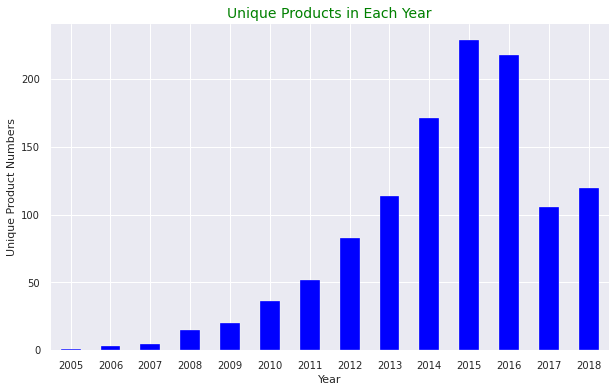

year
2005      1
2006      3
2007      5
2008     15
2009     20
2010     36
2011     52
2012     83
2013    114
2014    171
2015    229
2016    218
2017    106
2018    120
Name: product_id, dtype: int64


In [ ]:
# How many unique products in each year?
unique_prod = df.groupby('year')['product_id'].nunique()

# Plot unique product numbers in each year
plt.figure(figsize = (10,6))
unique_prod.plot(kind='bar', color = 'b', rot =0)
plt.title('Unique Products in Each Year', color = 'g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Product Numbers')
plt.show()

# Print unique product numbers in each year
print(unique_prod)

We have total 1171 unique products in the dataset which belongs to year between 2000 and 2014. As it may be observed in the chart and table, the number of unique products for each year has increased generally with the progress of the year except 2014. There is a slight decrease in 2014 but we have only data until June in 2014.

### 2.4. "review_ length" Feature

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

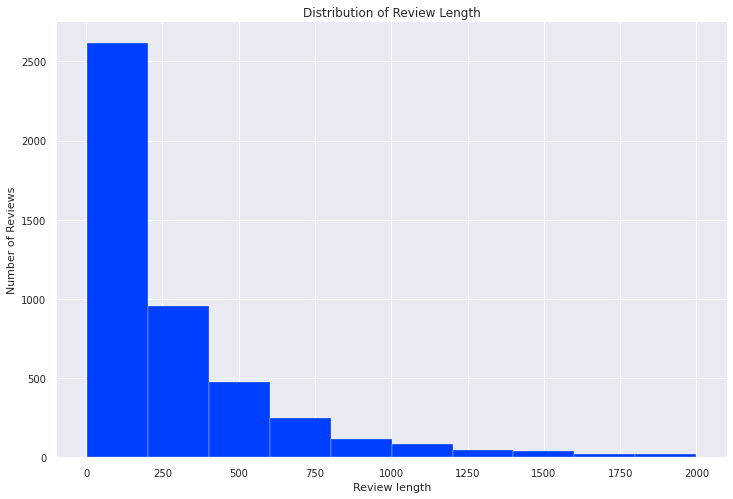

In [ ]:
##########################################
## PLOT DISTRIBUTION OF REVIEW LENGTH   
##########################################
plt.figure(figsize = (15,8))

review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 2000].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

In [ ]:
# Let's see how the rating classes change for each year in a table and graph.
# Create a dataframe which shows the relationship between review numbers and rating classes for each year

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
    
feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                       '% of Relevant Rating Number in This Year'] 
feature['% of Relevant Rating in the Total'] = (feature['Relevant Rating Number'] / 22425)*100
        
feature

,Year,Total Reviews,Relevant Rating Number,% of Relevant Rating Number in This Year,% of Relevant Rating in the Total
0,2005,1,0,0.000000,0.000000
1,2006,5,2,40.000000,0.008919
2,2007,5,2,40.000000,0.008919
3,2008,17,6,35.294118,0.026756
4,2009,26,14,53.846154,0.062430
5,2010,54,29,53.703704,0.129320
6,2011,93,39,41.935484,0.173913
7,2012,152,59,38.815789,0.263099
8,2013,326,168,51.533742,0.749164
9,2014,474,259,54.641350,1.154961


<Figure size 864x576 with 0 Axes>

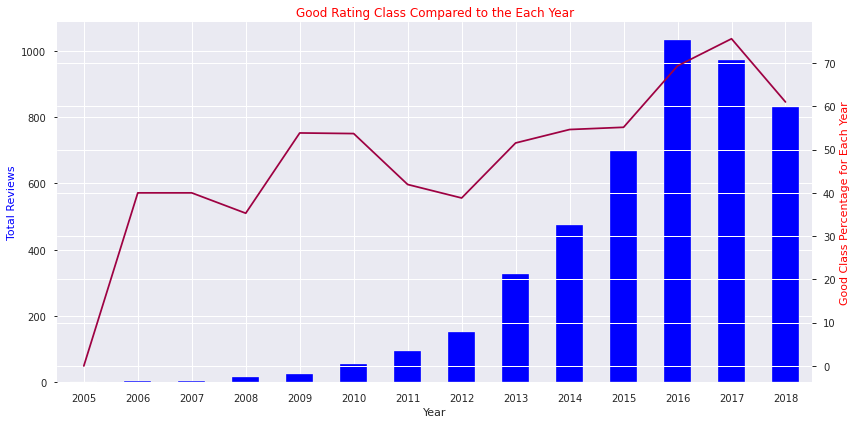

In [ ]:
##################################################################
# Create a graph for each rating class to compare within the years
##################################################################

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})

feature = df.groupby('year').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Year', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Year'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Year'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Year'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Year', color='r')
ax1.set_xlabel('Year')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Year")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [ ]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['clean_text'].apply(token)

In [ ]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

,product_id,reviewer_id,reviewer_name,rating,vote,verified,unix_review_time,categories,product_title,brand_name,review_text,rating_class,clean_text,year,rating_class_num,token,review_length
0,B000EPN8ZK,A3TQILK3NW422X,houston professional,4,14,True,1233878400,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,happliy surprised STILL GOING 2 YEARS LATER af...,good,happliy surprise still go years later read rev...,2009,1,"[happliy, surprise, still, go, years, later, r...",170
1,B000EPN8ZK,A2DSNSLKP5USA3,Joe Schmoe,5,3,False,1233705600,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,"The Fridge Best bang for my buck, Can't get a ...",good,fridge best bang buck cant get better deal mon...,2009,1,"[fridge, best, bang, buck, cant, get, better, ...",24
2,B000EPN8ZK,A2B20U8YF5NB3F,Amazon_Customer,1,50,False,1217203200,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,DOA I did not read the reviews before purchasi...,bad,doa not read review purchase pay price refrige...,2008,0,"[doa, not, read, review, purchase, pay, price,...",56


In [ ]:
# Create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,1500,100))
df.head()

,product_id,reviewer_id,reviewer_name,rating,vote,verified,unix_review_time,categories,product_title,brand_name,review_text,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
0,B000EPN8ZK,A3TQILK3NW422X,houston professional,4,14,True,1233878400,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,happliy surprised STILL GOING 2 YEARS LATER af...,good,happliy surprise still go years later read rev...,2009,1,"[happliy, surprise, still, go, years, later, r...",170,"(100, 200]"
1,B000EPN8ZK,A2DSNSLKP5USA3,Joe Schmoe,5,3,False,1233705600,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,"The Fridge Best bang for my buck, Can't get a ...",good,fridge best bang buck cant get better deal mon...,2009,1,"[fridge, best, bang, buck, cant, get, better, ...",24,"(0, 100]"
2,B000EPN8ZK,A2B20U8YF5NB3F,Amazon_Customer,1,50,False,1217203200,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,DOA I did not read the reviews before purchasi...,bad,doa not read review purchase pay price refrige...,2008,0,"[doa, not, read, review, purchase, pay, price,...",56,"(0, 100]"
3,B000EPN8ZK,ABBFHV7N1X6FV,disgusted,1,109,False,1185840000,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,sucks Do not buy this item. Igloo refrigerator...,bad,suck not buy item igloo refrigerators make cur...,2007,0,"[suck, not, buy, item, igloo, refrigerators, m...",115,"(100, 200]"
4,B000EPN8ZK,A3APHM015TQG1L,Mathew I. Piltz,1,204,False,1155859200,"['Appliances', 'Refrigerators, Freezers & Ice ...",4.6 Cu. Ft. Stainless Steel Refrigerator,Igloo,Stay away from Igloo products!! I purchased an...,bad,stay away igloo products purchase igloo refrig...,2006,0,"[stay, away, igloo, products, purchase, igloo,...",83,"(0, 100]"


In [ ]:
# Good rating percentages for each length bin with 50's
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         71.757652
(100, 200]       41.962175
(200, 300]       36.826347
(300, 400]       46.896552
(400, 500]       41.666667
(500, 600]       59.459459
(600, 700]       40.909091
(700, 800]       76.470588
(800, 900]       50.000000
(900, 1000]      57.142857
(1000, 1100]     75.000000
(1100, 1200]    100.000000
(1200, 1300]     50.000000
(1300, 1400]    100.000000
Name: rating_class_num, dtype: float64

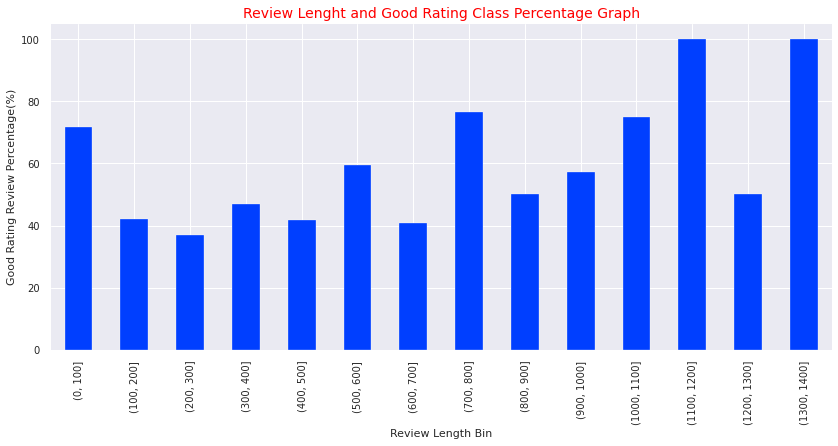

In [ ]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Lenght and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

As it might be seen the graph, the highest percentage of good rating reviews lies between 0-1000 words with 96.2% whereas lowest percentage of good rating reviews lies between 1700-1800 words with 66.6%. As the review length extends, the good rating tends to increase.  Generally, the customers who have write longer reviews (more than 1900 words) tends to give good ratings.

### Due to computational considerations, I will reduce reduce the number of observations. I will drop good rating class reviews longer than 150 words, and I will drop all observations earlier than year 2010.

In [ ]:
df3 = df.drop(df[(df['review_length'] > 150) & (df['rating_class'] == 'good')].index)

In [ ]:
df4 = df3.drop(df3[(df3['year'] < 2018)].index)
df4=df4.head(15000)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 797 entries, 544 to 4682
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   product_id         797 non-null    object
 1   reviewer_id        797 non-null    object
 2   reviewer_name      797 non-null    object
 3   rating             797 non-null    int64 
 4   vote               797 non-null    int64 
 5   verified           797 non-null    bool  
 6   unix_review_time   797 non-null    int64 
 7   categories         797 non-null    object
 8   product_title      797 non-null    object
 9   brand_name         797 non-null    object
 10  review_text        797 non-null    object
 11  rating_class       797 non-null    object
 12  clean_text         797 non-null    object
 13  year               797 non-null    int64 
 14  rating_class_num   797 non-null    int64 
 15  token              797 non-null    object
 16  review_length      797 non-null    int64 

In [ ]:
df4.head(2)

,product_id,reviewer_id,reviewer_name,rating,vote,verified,unix_review_time,categories,product_title,brand_name,review_text,rating_class,clean_text,year,rating_class_num,token,review_length,review_length_bin
544,B00MO6V96W,A2OQD2NS0K3BCX,Nancy Garrett,5,0,True,1532736000,"['Appliances', 'Refrigerators, Freezers & Ice ...",Danby DAR026A1BDD-3 DAR026A1BDD Compact Refrig...,Danby,Love that it doesn't have a little Keeps thing...,good,love doesnt little keep things really cold lov...,2018,1,"[love, doesnt, little, keep, things, really, c...",25,"(0.0, 100.0]"
545,B00MO6V96W,A1RXS24M9QODFY,Mary L. Ehrhardt,5,0,True,1532649600,"['Appliances', 'Refrigerators, Freezers & Ice ...",Danby DAR026A1BDD-3 DAR026A1BDD Compact Refrig...,Danby,and it runs great still after a couple of mont...,good,run great still couple months hard find refrig...,2018,1,"[run, great, still, couple, months, hard, find...",37,"(0.0, 100.0]"


In [ ]:
df['review_length'].describe()

count    4688.000000
mean      109.426195
std       171.912670
min         2.000000
25%        22.000000
50%        58.000000
75%       132.000000
max      3248.000000
Name: review_length, dtype: float64

### 2.7. "clean_text" Feature

In [ ]:
# Create a new data frame with clean text and rating class number
df5 = df4[["clean_text", "rating_class_num"]].reset_index()
df5.head(10)

,index,clean_text,rating_class_num
0,544,love doesnt little keep things really cold lov...,1
1,545,run great still couple months hard find refrig...,1
2,546,not buy unit replacement mini fridge buy years...,0
3,547,great little fridge love far really nice love ...,1
4,548,bad quality even worse customer service not bu...,0
5,549,upset arrive damage right side area x like eve...,0
6,550,durable buy work heavily use not freezer keep ...,1
7,551,three months later cool ls degrees issue day o...,0
8,552,work good work well,1
9,553,good perfectly good small fridge couple negati...,1


In [ ]:
# Initialize the countervectorizer
countVec = CountVectorizer(ngram_range=(1, 2),binary=True)

In [ ]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797 entries, 0 to 796
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             797 non-null    int64 
 1   clean_text        797 non-null    object
 2   rating_class_num  797 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.8+ KB


In [ ]:
# Fit the 'clean_text' to countvectorizer
countVec.fit(df5["clean_text"])

CountVectorizer(analyzer='word', binary=True, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# Transform the matriz
transformed_matrix = countVec.transform(df5["clean_text"])

In [ ]:
# Convert matrix to array
transformed_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Extracting the feature names
names = countVec.get_feature_names()
len(names)

18879

In [ ]:
# Adding a 'rating' column from previous dataframe's rating value
df6 = pd.DataFrame(transformed_matrix.toarray(), columns=names)
df6['rating'] = df5['rating_class_num']

In [ ]:
df6['rating'].head()

0    1
1    1
2    0
3    1
4    0
Name: rating, dtype: int64

In [ ]:
# Create lists for forming a dataframe summary
feature_names = []
avg_ratings = [] 
rating_counts = []
for name in names:
    if name != 'rating':    
        avg_rating = df6[df6[name]== 1]['rating'].mean()
        rating_count = df6[df6[name]== 1]['rating'].count()
        feature_names.append(name)
        avg_ratings.append(avg_rating)
        rating_counts.append(rating_count)  
    else:
        pass

In [ ]:
##### Create a new dataframe from words, average ratings, and rating counts
df_summary = pd.DataFrame({'feature_name':feature_names, 'avg_rating': avg_ratings, 'rating_count':rating_counts})



In [ ]:
# Let's see the new dataframe
df_summary

,feature_name,avg_rating,rating_count
0,ability,0.000000,1
1,ability force,0.000000,1
2,abilitytrying,0.000000,1
3,abilitytrying return,0.000000,1
4,able,0.421053,19
...,...,...,...
18874,zero refrigerators,0.000000,1
18875,zero star,0.000000,2
18876,zone,0.000000,2
18877,zone drawer,0.000000,1


#### Good rating words

In [ ]:
# Words that are commonly used in the reviews which have good ratings
df_good = df_summary.query("rating_count > 20").sort_values(by='avg_rating', ascending=False)[4:50]
df_good.head(50)

,feature_name,avg_rating,rating_count
5935,four star,0.952381,21
18401,work great,0.937500,48
9450,love,0.936170,94
13049,quiet,0.934783,46
6998,great,0.871508,179
5665,fit,0.863636,44
14151,room,0.862745,51
9145,little,0.857143,77
4476,drink,0.857143,35
15234,size,0.846154,65


In [ ]:
wc_good = dict(zip(df_good['feature_name'].tolist(), df_good['avg_rating'].tolist()))

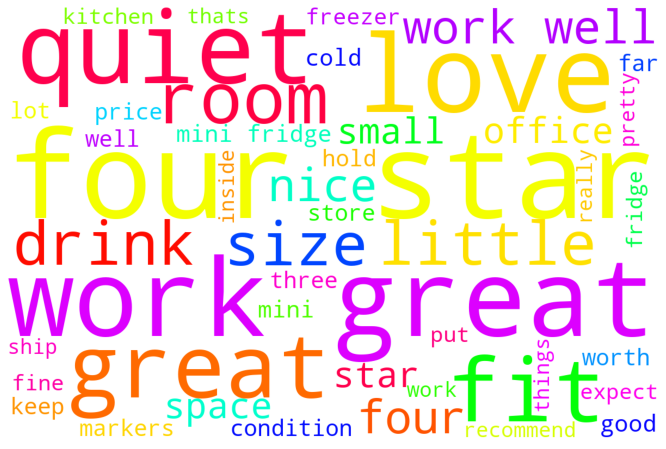

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
CustomStopwords = list(STOPWORDS) + ['days','across','onset','caused','especially','include','ongoing']

wordcloudimage = WordCloud(max_words=80,
                           font_step = 2,
                           max_font_size = 700,
                           stopwords = CustomStopwords,
                           width = 1200,
                           height = 800,
                           colormap = 'hsv',
                           background_color = 'white').generate_from_frequencies(wc_good)
                      
plt.figure(figsize=(15,8))
plt.imshow(wordcloudimage)
plt.axis('off')
plt.show()

Fixing the rating count value is above 100, the most common 50 words which belong to good rating class are shown in the table above. Each of these words define which products what kind of good impression have on the customers. 

#### Bad rating words

In [ ]:
# Words that are commonly used in the reviews which have bad ratings
df_bad = df_summary.query("rating_count > 10").sort_values(by= 'avg_rating', ascending=True)[:40]

In [ ]:
df_bad.sort_values(by=['avg_rating'],ascending=False,inplace=True)
df_bad

,feature_name,avg_rating,rating_count
1262,beware,0.076923,13
1175,behind,0.076923,13
17100,try,0.074074,27
14759,service,0.072727,55
15965,stop,0.069767,43
10571,never,0.066667,45
3281,customer service,0.064516,31
17792,warn,0.062500,16
17452,us,0.062500,16
597,appliance,0.058824,17


In [ ]:
wc_bad = dict(zip(df_bad['feature_name'].tolist(), df_bad['rating_count'].tolist()))
wc_bad

{'appliance': 17,
 'behind': 13,
 'beware': 13,
 'brand': 27,
 'buy lg': 13,
 'buyer': 12,
 'buyer beware': 11,
 'call': 42,
 'contact': 14,
 'customer service': 31,
 'die': 14,
 'extend': 11,
 'fix': 36,
 'ge': 20,
 'least': 14,
 'lg': 34,
 'never': 45,
 'never buy': 13,
 'not buy': 28,
 'not cool': 11,
 'one star': 25,
 'piece': 27,
 'repair': 48,
 'samsung': 22,
 'service': 55,
 'spend': 17,
 'stand': 20,
 'stop': 43,
 'stop cool': 11,
 'stop work': 27,
 'tell': 34,
 'terrible': 15,
 'try': 27,
 'twice': 13,
 'us': 16,
 'warn': 16,
 'warranty': 50,
 'worst': 16,
 'would not': 21,
 'year warranty': 11}

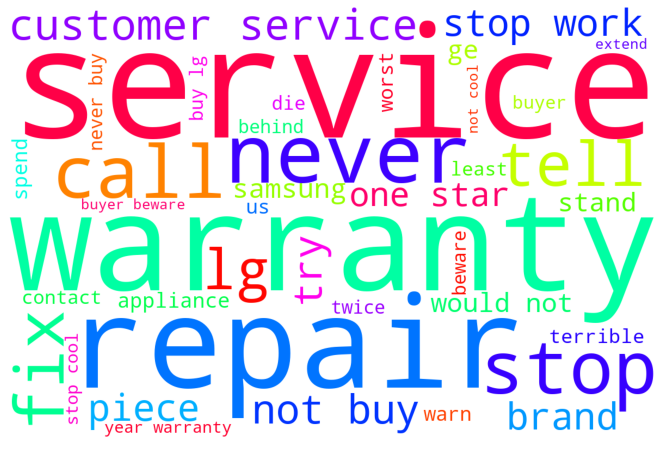

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

# Creating a custom list of stopwords
CustomStopwords = list(STOPWORDS) + []

wordcloudimage = WordCloud(max_words=80,
                           font_step = 2,
                           max_font_size = 700,
                           stopwords = CustomStopwords,
                           width = 1200,
                           height = 800,
                           colormap = 'hsv',
                           background_color = 'white').generate_from_frequencies(wc_bad)
                      
plt.figure(figsize=(15,8))
plt.imshow(wordcloudimage)
plt.axis('off')
plt.show()

In [ ]:
df4.to_csv('Reduced_Cleaned_Reviews.csv', sep=',', encoding='utf-8', index = False)